### 1. Introduction

#### - Purpose of the Report: 
##### Explain objectives of analyzing spotify data and questions we aim to answer

#### - Briefly describe datasets, including contents and relevance

#
### 2. Data Preparation
#### - loading data
#### - initial exploration (head, info)
#### - data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('genres_v2.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

/var/folders/h_/q1_b1v7x1p3dp6dhckks0t180000gn/T/ipykernel_4030/4028231336.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('genres_v2.csv')


In [3]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df2 = pd.read_csv('playlists.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Playlist  39 non-null     object
 1   Genre     39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [5]:
df2.head()

,Playlist,Genre
0,19WuHd4MxWLzE1fpMmw4S4,Dark Trap
1,6XyR8uzgkSoDzHuOxxRtLH,Dark Trap
2,37Ij3ofyhvEhFEH8YZMZ2X,Dark Trap
3,07zTlfPpsxeoWdumbkNWMI,Dark Trap
4,2dClSRLsnptdkDQnpi5H2f,Dark Trap


In [6]:
print(df1.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [7]:
print(df2.isnull().sum())

Playlist    0
Genre       0
dtype: int64


In [8]:
df1.drop(columns=['Unnamed: 0', 'title', 'type', 'uri', 'track_href', 'analysis_url', 'time_signature', ], inplace=True)

In [9]:
print(df1.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
id                      0
duration_ms             0
genre                   0
song_name           20786
dtype: int64


In [10]:
df1['song_name'].fillna('Unknown', inplace=True)

In [11]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')

In [12]:
print(df1.columns)
print(df2.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'genre', 'song_name'],
      dtype='object')
Index(['playlist', 'genre'], dtype='object')


In [13]:
merged_df = pd.merge(df1, df2, left_on='genre', right_on='genre', how='inner')

In [14]:
print(merged_df.head())
print(f"Shape of merged DataFrame: {merged_df.shape}")
print(merged_df.describe(include='all'))

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1         0.42        0.0598   
1         0.831   0.814    2    -7.364     1         0.42        0.0598   
2         0.831   0.814    2    -7.364     1         0.42        0.0598   
3         0.831   0.814    2    -7.364     1         0.42        0.0598   
4         0.831   0.814    2    -7.364     1         0.42        0.0598   

   instrumentalness  liveness  valence    tempo                      id  \
0            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
1            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
2            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
3            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
4            0.0134    0.0556    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   

   duration_ms      genre            song_name                playlist  
0       124539  Dark Trap

In [15]:
merged_df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
genre               0
song_name           0
playlist            0
dtype: int64

In [16]:
merged_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
genre                object
song_name            object
playlist             object
dtype: object

In [17]:
unique_keys = merged_df['key'].unique()
print(unique_keys)

[ 2  8  5  0  1 11 10  6  7  9  4  3]


In [18]:
merged_df['key'] = merged_df['key'].astype('category')

#
### 3. Exploratory Data Analysis
#### - descriptive stats: describe()
#### - correlation analysis 

In [19]:
merged_df.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000,93876.000000
mean,0.640232,0.672124,-6.816974,0.588979,0.158851,0.167220,0.083819,0.198505,0.410168,152.442228,199689.078977
std,0.164815,0.187146,2.966376,0.492022,0.135390,0.219114,0.231762,0.153884,0.233549,29.079427,60565.124169
min,0.065100,0.000243,-33.357000,0.000000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000,38333.000000
25%,0.524000,0.541000,-8.435000,0.000000,0.049900,0.011800,0.000000,0.101000,0.214000,129.985000,156223.500000
50%,0.654000,0.680000,-6.405000,1.000000,0.104000,0.069800,0.000002,0.132000,0.392000,149.975000,199173.000000
75%,0.768000,0.824000,-4.766000,1.000000,0.246000,0.237000,0.001050,0.258000,0.585000,175.330000,236093.000000
max,0.988000,0.999000,3.148000,1.000000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000,728413.000000


In [20]:
numerical_df = merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                  danceability    energy  loudness      mode  speechiness  \
danceability          1.000000 -0.209545 -0.074167  0.009820     0.196718   
energy               -0.209545  1.000000  0.711265  0.035032     0.062653   
loudness             -0.074167  0.711265  1.000000  0.061363     0.016599   
mode                  0.009820  0.035032  0.061363  1.000000     0.003057   
speechiness           0.196718  0.062653  0.016599  0.003057     1.000000   
acousticness         -0.019075 -0.482647 -0.365350 -0.050529     0.009826   
instrumentalness     -0.173129 -0.030661 -0.236158 -0.056438    -0.218300   
liveness             -0.110047  0.226831  0.145870  0.041885     0.118979   
valence               0.314255  0.240285  0.231627 -0.001438     0.198325   
tempo                -0.083156  0.045193  0.035191 -0.011169     0.105812   
duration_ms          -0.143710  0.000305  0.008273 -0.084726    -0.121596   

                  acousticness  instrumentalness  liveness   valence  \
dan

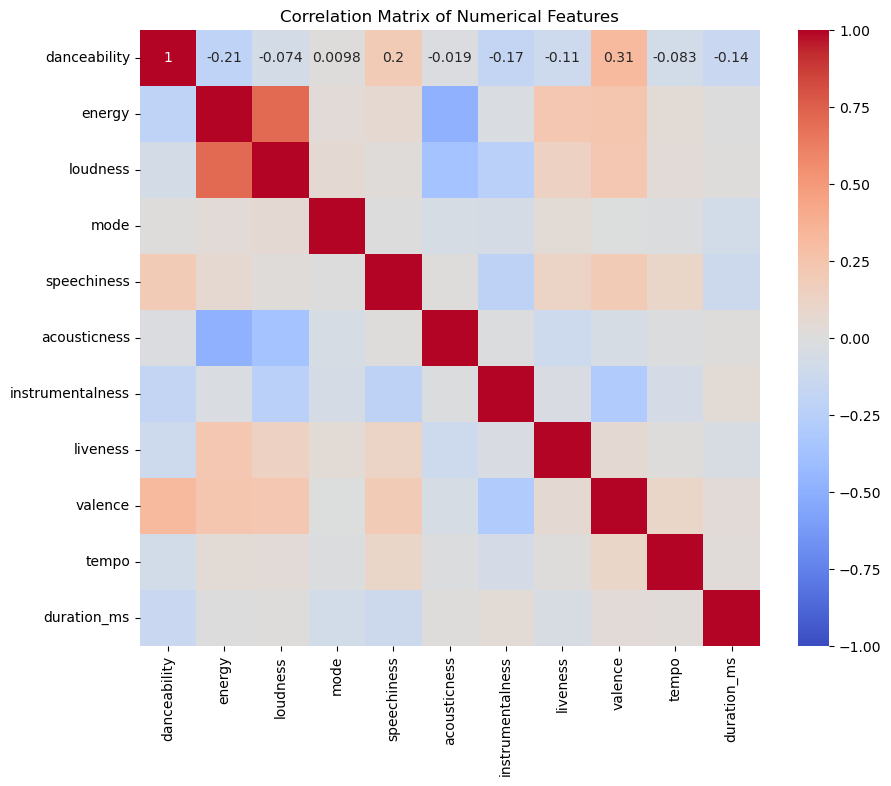

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Interpretation of Heatmap
#### Strong Positive Correlatoins:
##### danceability and valence (.31): moderate positive correlation, indicating that more danceable tracks tend to have a higher valence (happiness or positivity)

##### energy and loudness (.71): high positive correlation suggests that tracks with higher energy levels tend to also be louder.

##### energy and valence (.24): moderate positive correlation suggests that tracks with higher energy levels are also more likely to be more positive or happier.

##### Liveness and energy (.23): moderate positive correlations suggests that tracks that are more lively have higher energy levels.

#### Strong Negative Correlations: 
##### acousticness and energy (-.48): A strong negative correlation suggests that tracks with higher acousticness tend to have lower energy levels.

##### instrumentalness and valence (-.29): moderate negative correlation indicates that tracks with higher instrumentalness (less vocals) are often less positive or happier.

##### danceability and energy (-.21): mild negative correlation indicates that ss one increases, the other tends to decrease, but the relationship is not very strong

#### Unexpected Findings:
##### Tempo does not have any strong correlations 

#
## Question x4
#### Approach

# Determining Average Tempo and Danceability by Genre

In [22]:
avg_tempo_by_genre = merged_df.groupby('genre')['tempo'].mean().reset_index()
avg_tempo_by_genre.columns = ['genre', 'average tempo']

avg_danceability_by_genre = merged_df.groupby('genre')['danceability'].mean().reset_index()
avg_danceability_by_genre.columns = ['genre', 'average danceability']

In [23]:
merged_tempo_danceability = pd.merge(avg_tempo_by_genre, avg_danceability_by_genre, on='genre', how='left')
merged_tempo_danceability.head(8)

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
1,Emo,153.888640,0.493699
2,Hiphop,162.980479,0.698982
3,Pop,152.098937,0.676807
4,Rap,126.006374,0.742877
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [24]:
merged_tempo_danceability['genre'] = merged_tempo_danceability['genre'].astype(str)
merged_tempo_danceability['average tempo'] = merged_tempo_danceability['average tempo'].astype(float)
merged_tempo_danceability['average danceability'] = merged_tempo_danceability['average danceability'].astype(float)

print(merged_tempo_danceability.dtypes)

genre                    object
average tempo           float64
average danceability    float64
dtype: object


Text(0, 0.5, 'Genre')

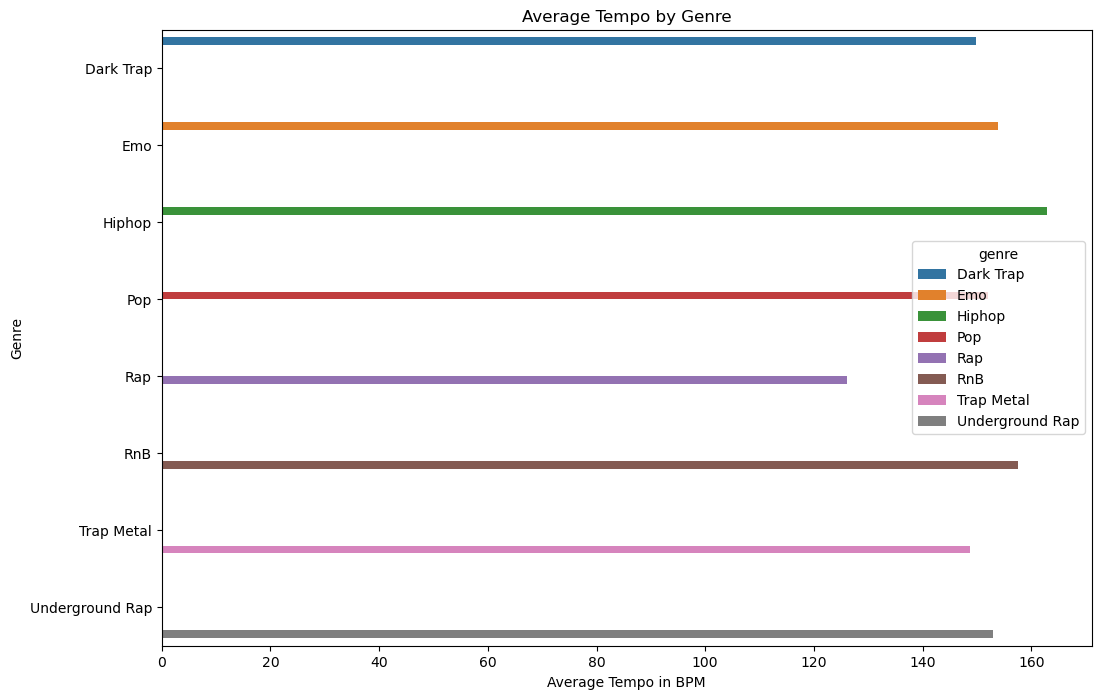

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average tempo', y='genre', data=avg_tempo_by_genre, hue='genre')

plt.title('Average Tempo by Genre')
plt.xlabel('Average Tempo in BPM')
plt.ylabel('Genre')

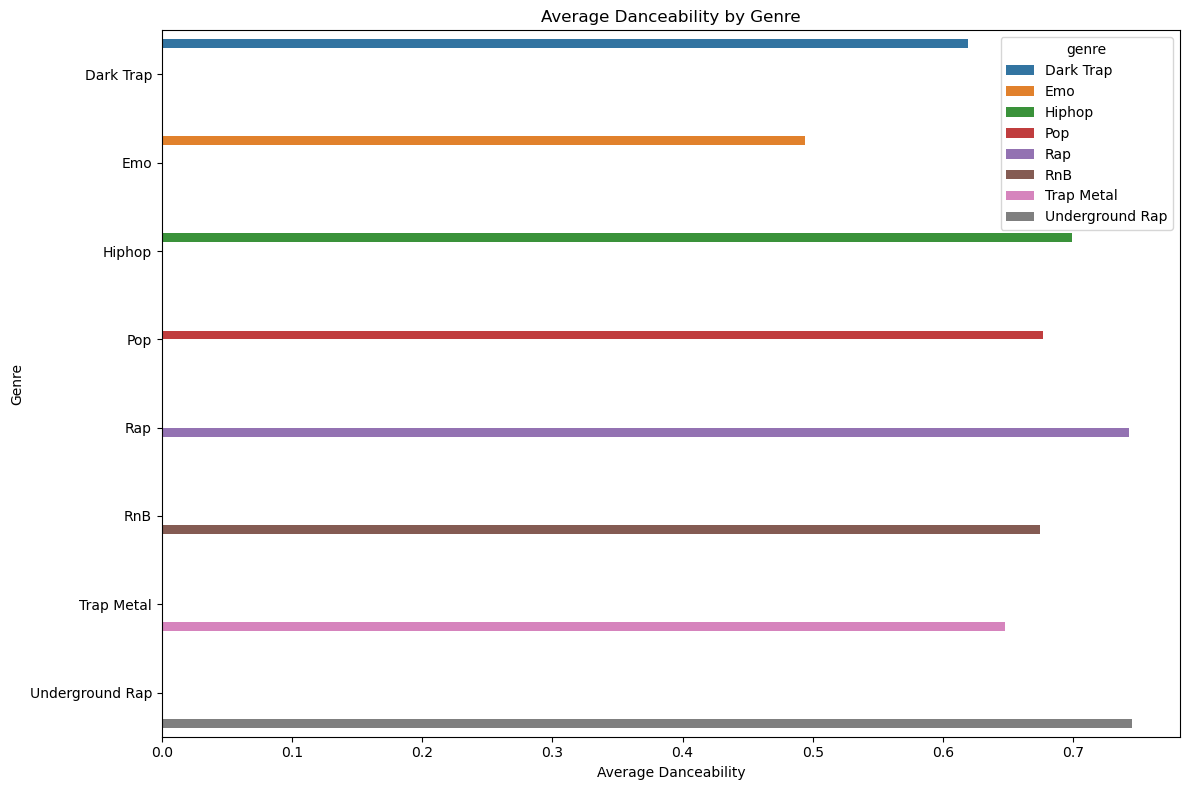

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average danceability', y='genre', data=avg_danceability_by_genre, hue='genre')

plt.title('Average Danceability by Genre')
plt.xlabel('Average Danceability')
plt.ylabel('Genre')
plt.tight_layout()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


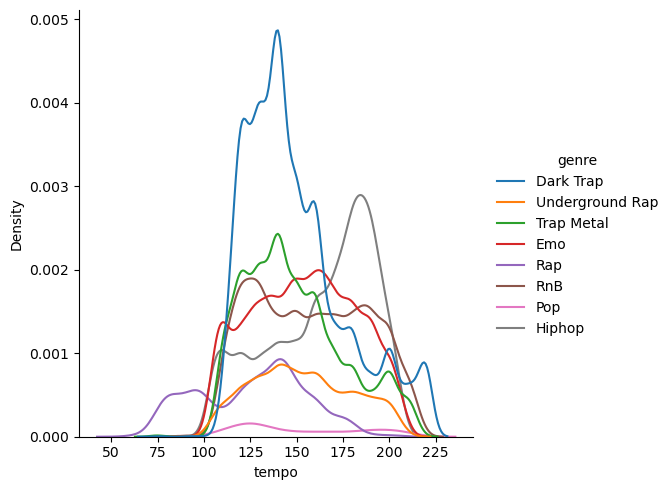

In [27]:
sns.displot(merged_df, x='tempo', hue='genre', kind='kde')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


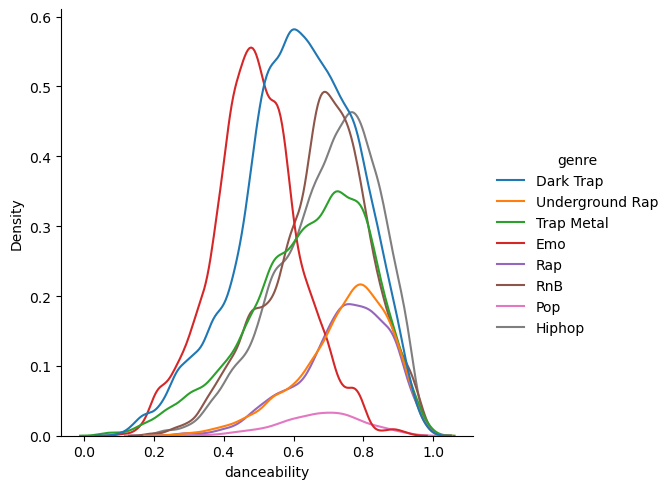

In [28]:
sns.displot(merged_df, x='danceability', hue='genre', kind='kde')

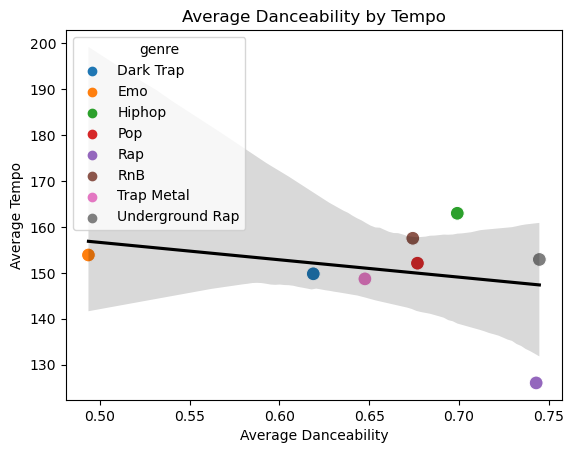

In [29]:
sns.scatterplot(
    data=merged_tempo_danceability, 
    x='average danceability', 
    y='average tempo', 
    hue="genre",
    palette="tab10",
    s=100)

sns.regplot(
    data=merged_tempo_danceability, 
    x='average danceability', 
    y='average tempo', 
    scatter=False,
    line_kws={'color': 'black'}
)

plt.xlabel('Average Danceability')
plt.ylabel('Average Tempo')
plt.title('Average Danceability by Tempo')
plt.show()

In [30]:
correlation = merged_tempo_danceability['average tempo'].corr(merged_tempo_danceability['average danceability'])
print(f"Correlation between Average Tempo and Average Danceability: {correlation}")

Correlation between Average Tempo and Average Danceability: -0.28068477113136747


In [31]:
def is_outlier(column: pd.Series):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~column.between(lower_bound, upper_bound)

merged_tempo_danceability[~is_outlier(merged_tempo_danceability['average tempo'])]

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
1,Emo,153.888640,0.493699
3,Pop,152.098937,0.676807
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [32]:
def is_outlier(column: pd.Series):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~column.between(lower_bound, upper_bound)

merged_tempo_danceability[~is_outlier(merged_tempo_danceability['average danceability'])]

,genre,average tempo,average danceability
0,Dark Trap,149.791186,0.618834
2,Hiphop,162.980479,0.698982
3,Pop,152.098937,0.676807
4,Rap,126.006374,0.742877
5,RnB,157.533793,0.674206
6,Trap Metal,148.684947,0.647564
7,Underground Rap,152.914521,0.744658


In [33]:
# Filtered out 'emo' and 'rap' genres
filtered_data = merged_tempo_danceability[~merged_tempo_danceability['genre'].isin(['Emo', 'Rap'])]
correlation = filtered_data['average tempo'].corr(filtered_data['average danceability'])
print(f"Correlation between Average Tempo and Average Danceability (omitting emo and rap): {correlation}")

Correlation between Average Tempo and Average Danceability (omitting emo and rap): 0.44537958654919263


# Interpretation
##### Our goal was to see if there was any correlation between the tempo of a genre and the danceability per song.

##### First we needed to group the tempos and danceability categories together by genre type. We then took the mean for each category to so that we were working with one numerical data point per genre per category. We merged those two new values into its own data frame and converted the data types to strings and floats as needed.

##### We made two bar plots to showcase the averages for each category by genre as a visual. Here we see that ‘Rap’ has the slowest tempo whereas ‘Hiphop’ has the fastest. For danceability, ‘Underground Rap’ has the highest value just barely squeaking past ‘Rap’, whereas ‘Emo’ has the slowest.

##### We chose to display this information differently via a distribution plot, using the data from the original data frame and breaking it down by genre. Here it shows that for tempo there are a few genres, like ‘Dark Trap’ for instance, that appear to have the majority of their tempo in a small range of 120-150 where as ‘Pop’ is more spread out across the entire range. Danceability had a similar display where ‘Pop’ is once again spread across the full range whereas other genres seemed to peak between a smaller range.

##### Overall there seems to be a weak negative correlation between danceability and tempo. When taking a look at the lined scatter plot above we noticed that the genres of 'Rap' and 'Emo' seemed to be outliers for the dataset. After removing both of them and running the correlation again it improved from a -0.28 to a .45. This updated data indicates a moderate correlation between the two features.

##### We created a regression plot to showcase how the two variables interact with one another and found that, combined with running a correlation test, there seems to be a weak negative correlation between danceability and tempo. When taking a look at the lined scatter plot above we noticed that the genres of 'Rap' and 'Emo' seemed to be outliers for the dataset. After removing both of them and running the correlation again it improved from a -0.28 to a .45. This updated data indicates a moderate correlation between the two features.

#
### 4. Conclusion
#### - Recap main insights from analyses 
#### - Implications or industry insights, etc

#
### Scatter plot for danceability vs. valence

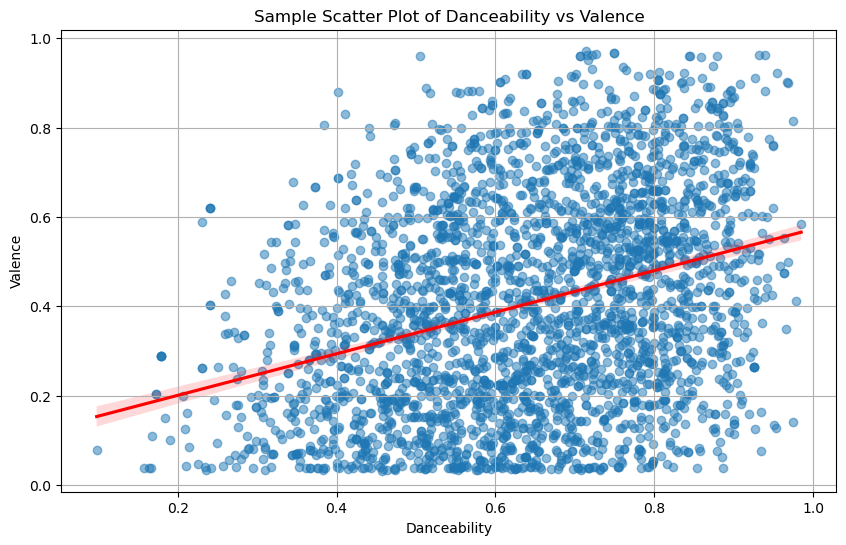

In [34]:
sample_df = merged_df.sample(n=3000, random_state=1)  # Random sample 3000 points

plt.figure(figsize=(10, 6))
sns.regplot(x='danceability', y='valence', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sample Scatter Plot of Danceability vs Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

### Interpretations
##### - there is a tendency for tracks that are more danceable to have a higher valence, suggesting they are generally more positive or happier. However, this relationship is not very strong
##### - tracks that are more danceable are often perceived as more positive or happier. This could be relevant in understanding which music genres or styles contribute to higher danceability and positivity-- investigate the genres of the plots that go against this perception
##### - Further Analysis: Investigate if specific genres show a stronger or different relationship between danceability and valence

#
### Scatter Plot for Energy vs. Loudness

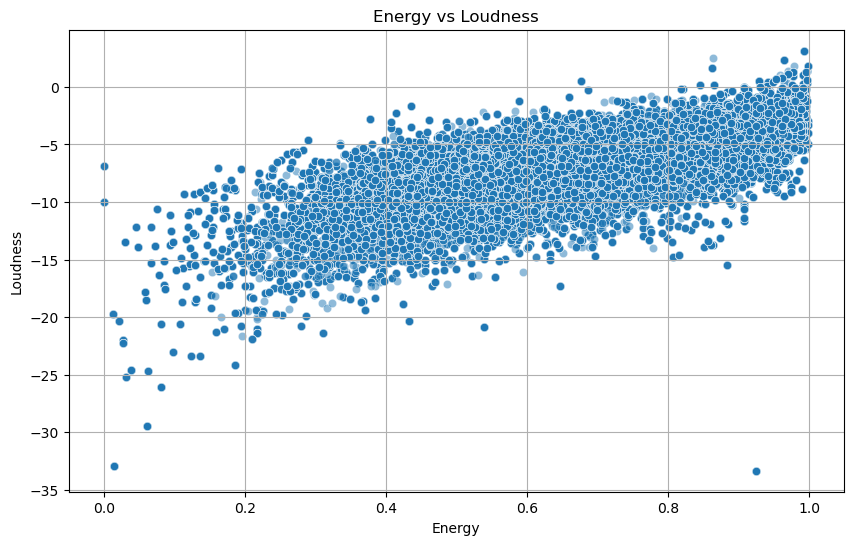

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='energy', y='loudness', alpha=0.5)
plt.title('Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.grid(True)
plt.show()

### Interpretations
##### - tracks with higher energy are typically louder
##### - could be relevant for genres like electronic dance music or rock, etc., where energetic tracks are often loud (practical implication)
##### - Further Exploration: Investigate if certain genres or styles of music show a stronger or different relationship between energy and loudness

#
### Scatter Plot for Energy vs. Valence

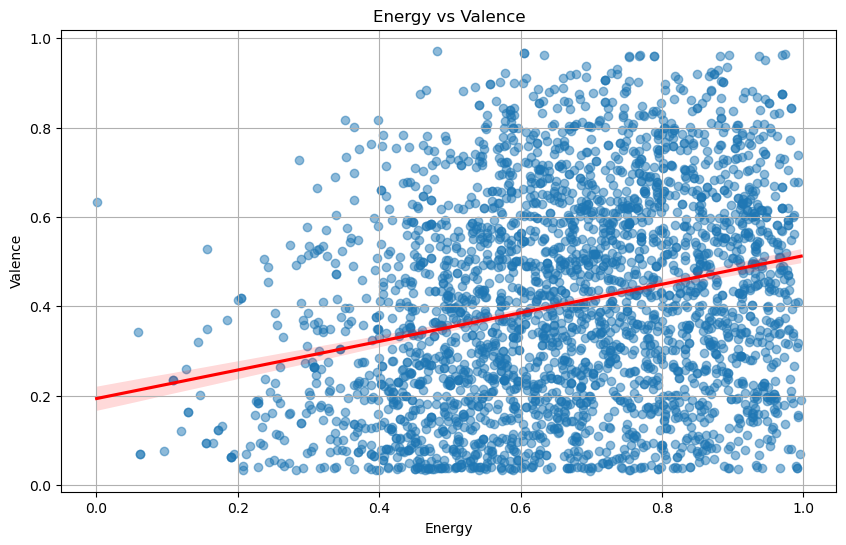

In [36]:
sample_df = merged_df.sample(n=3000, random_state=1)  # Random sample 3000 points


plt.figure(figsize=(10, 6))
sns.regplot(x='energy', y='valence', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Energy vs Valence')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

### Interpretation
##### - The relationship between "mood and genre" might reflect the general trend in music where higher energy tracks tend to be more upbeat or positive. However, given the moderate correlation, there are many energetic tracks that aren't particularly positive and vice versa.
##### - Further exploration: Examine if specific genres of music show stronger relationships between energy and valence.

#
### Scatter Plot for Liveness vs. Energy

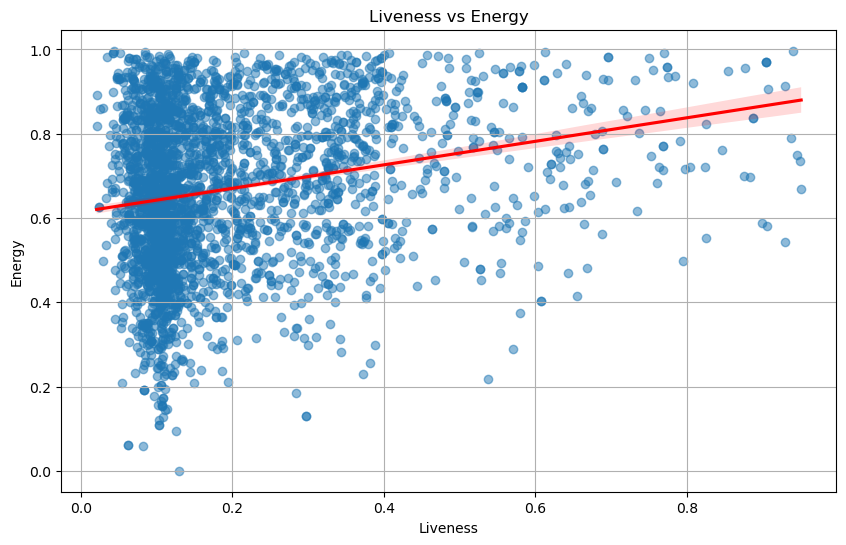

In [37]:
plt.figure(figsize=(10, 6))
sns.regplot(x='liveness', y='energy', data=sample_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Liveness vs Energy')
plt.xlabel('Liveness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

### Interpretations
##### - While there is a general tendency for higher liveness to be associated with higher energy, there are still many exceptions.
##### - there are more tracks with lower liveness, and a few tracks with very high liveness.
##### - The correlation, while positive, is not very strong, indicating that liveness is just one of several factors that influence energy.

#
#
### Distribution Plot for Acousticness

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


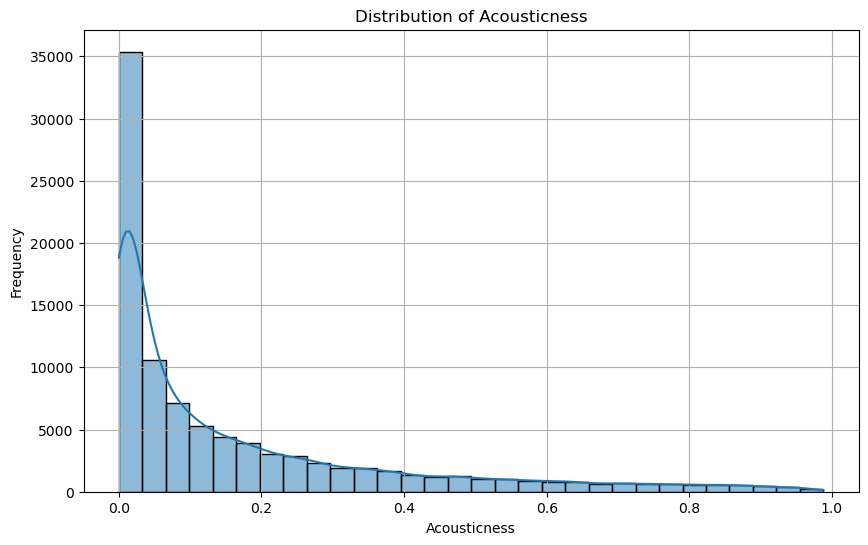

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['acousticness'], bins=30, kde=True)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Interpretation
##### - Most Tracks Have Low Acousticness values
##### - There are some tracks with higher acousticness, but they are less frequent.
##### - Consider investigating why some tracks have extremely high acousticness? Are these tracks of a specific genre or type that typically has more acoustic quality?

#
#
### Box Plot for Energy by Genre

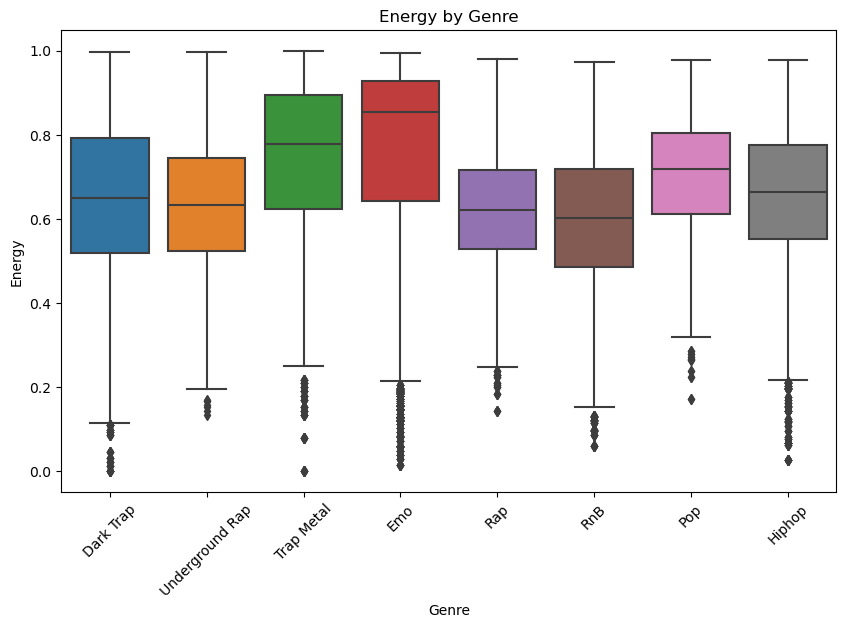

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='genre', y='energy')
plt.title('Energy by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

### Interpretations
##### - The line inside each box represents the median energy level for that genre. This provides an indication of the typical energy level within each genre
##### - For genres that have significantly higher or lower energy levels, it might be worth exploring what characteristics contribute to these differences.
##### - For additional analysis: 
##### - Analyze trends in energy levels across different genres using line chart.
##### - Investigate individual genres with extreme values to understand what might be causing these deviations (specific artists?)

#
### Average energy levels by genre using line chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


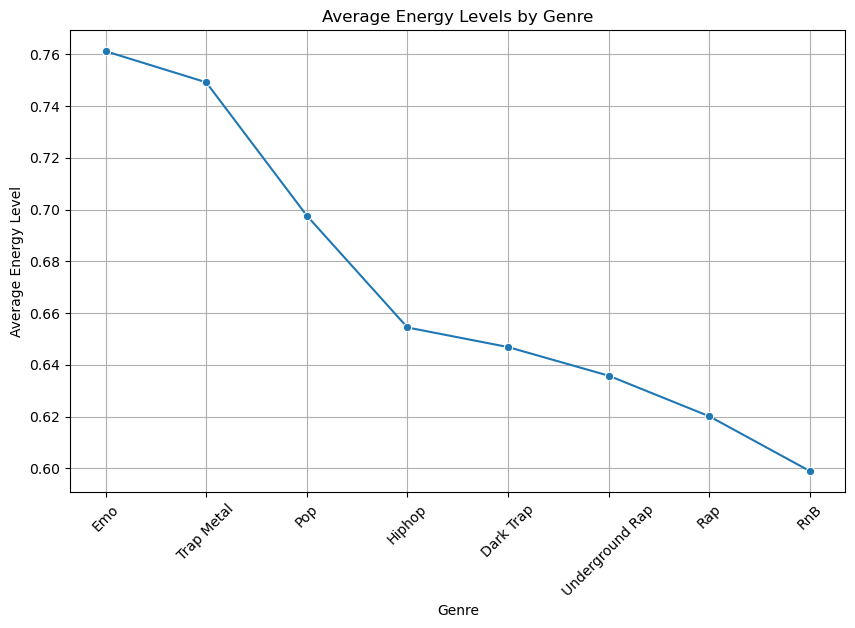

In [40]:
energy_by_genre = merged_df.groupby('genre')['energy'].mean().reset_index()
energy_by_genre = energy_by_genre.sort_values(by='energy', ascending=False)
plt.figure(figsize=(10, 6))
sns.lineplot(data=energy_by_genre, x='genre', y='energy', marker='o')
plt.title('Average Energy Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy Level')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

### Average Energy Levels by Genre BarPlot

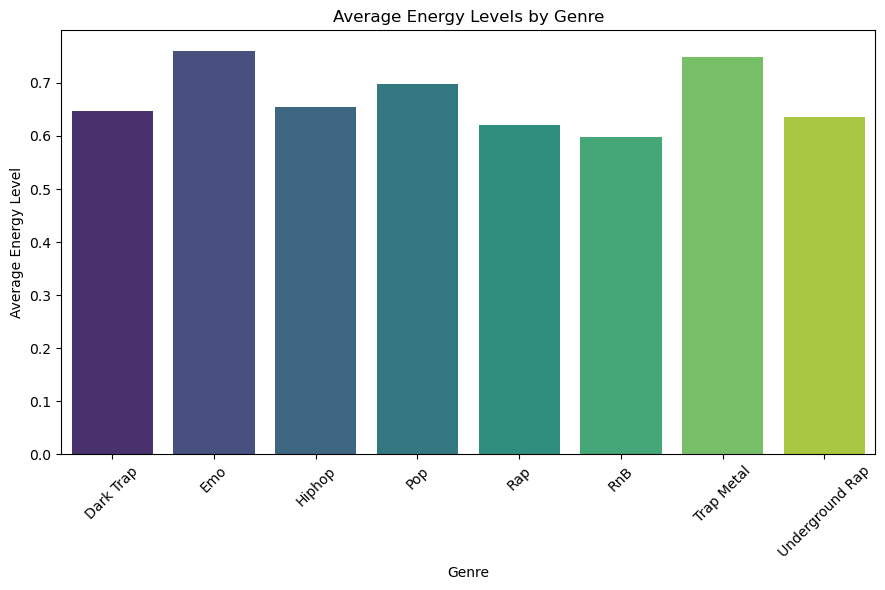

In [41]:
genre_energy_avg = merged_df.groupby('genre')['energy'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(data=genre_energy_avg, x='genre', y='energy', palette='viridis')

plt.title('Average Energy Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy Level')
plt.xticks(rotation=45)  

plt.tight_layout()

### Frequency distribution of tempo values across all tracks

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


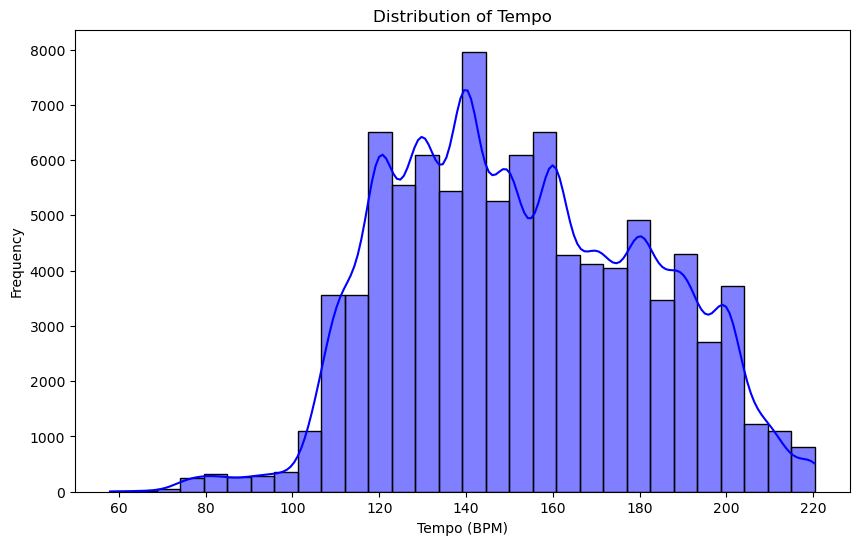

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['tempo'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

### Interpretations
##### - Fairly symmetric with a couple peaks (120, 140, 160)
##### - Most songs have a tempo around 140
##### - further investigate the genres related to these tempos 

#
### Average Tempo by Genre BarPlot

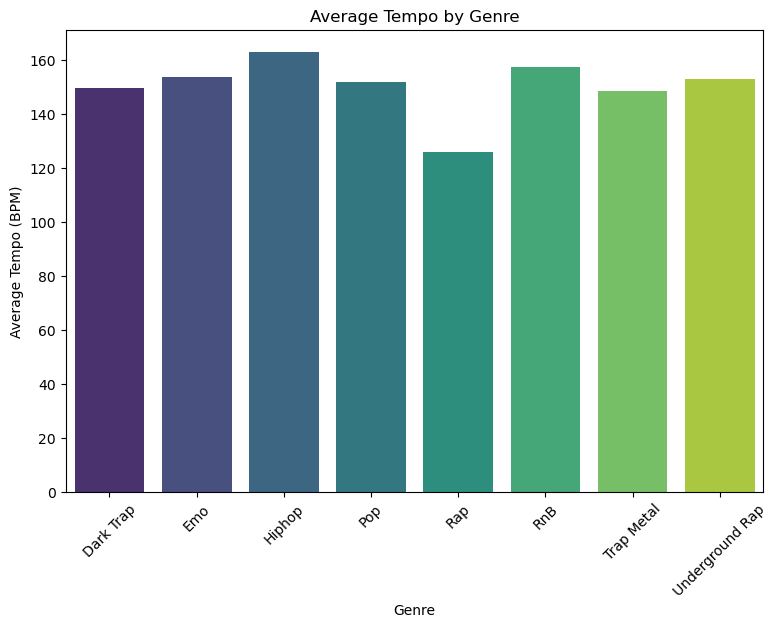

In [43]:
genre_tempo_avg = merged_df.groupby('genre')['tempo'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(data=genre_tempo_avg, x='genre', y='tempo', palette='viridis')
plt.title('Average Tempo by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Tempo (BPM)')
plt.xticks(rotation=45)
plt.show()

### Tempo By Genre 

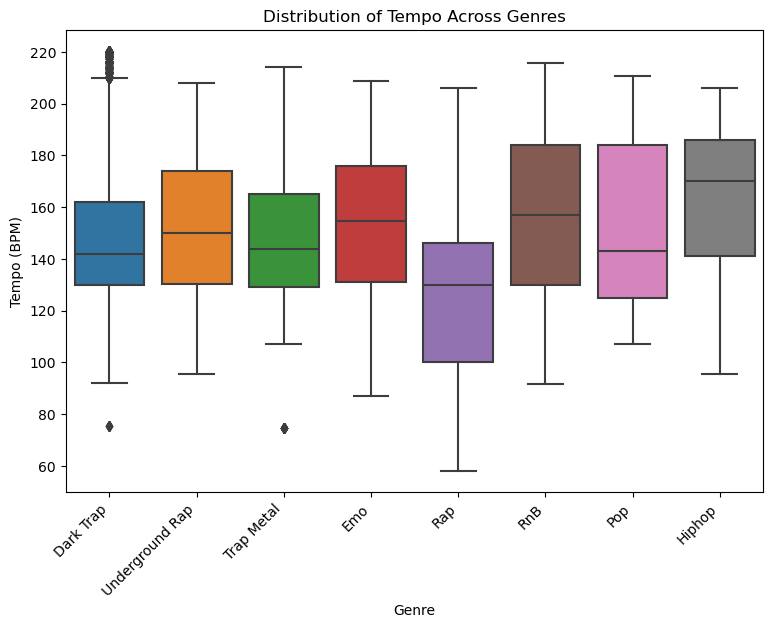

In [44]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=merged_df, x='genre', y='tempo')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Tempo Across Genres')
plt.xlabel('Genre')
plt.ylabel('Tempo (BPM)')
plt.show()

#
### IDEAS
#
#### - Genre Composition?
##### Visualizations:
##### - Pie Chart: Show the proportion of each genre in the dataset
##### - Stacked Bar Chart: Compare the distribution of features across different genres
##### Analysis:
##### - Assess the composition of genres in dataset and how it might influence findings and to help audience understand what were working with
#
#### 1. How does tempo vary across different genres, and are there notable patterns?
##### - Investigating the distribution of tempo across genres can highlight genre-specific tempo trends and patterns--are certain genres associated with faster or slower tempos and how might this influence the overall genre characteristics.
##### Visualizations:
##### - Box Plot: Show the distribution of tempo values for each genre using a box plot.
##### - Bar Chart or line chart: Use a bar chart to show the average tempo for each genre.
##### - Histogram: Display frequency distribution of tempo values across all tracks.
##### Analysis:
##### - Understand overall distribution of tempo values and identify any skewness or unusual patterns; Determine if certain genres typically have faster or slower tempos. Investigate why genres like EDM have higher tempos compared to genres like rap

#
#### 2. How do energy levels vary across different genres?
##### Visualizations:
##### - Box Plot: Compare distribution of energy levels across genres.
###### Purpose: Display the spread and central tendency of energy levels within each genre.
###### Interpretation: Determine the energy profile of different genres and how energy levels are distributed.
##### - Bar Chart: Show the average energy level for each genre.
###### Purpose: Compare the mean energy level of each genre.
###### Interpretation: Identify which genres generally have higher or lower energy levels.
#

#
#### 4. 

#### 3. How do danceability and valence interact across different genres?
##### - This question examines whether the relationship between danceability and valence varies across genres
##### - Further Analysis from prior graph: Investigate if specific genres show a stronger or different relationship between danceability and valence

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


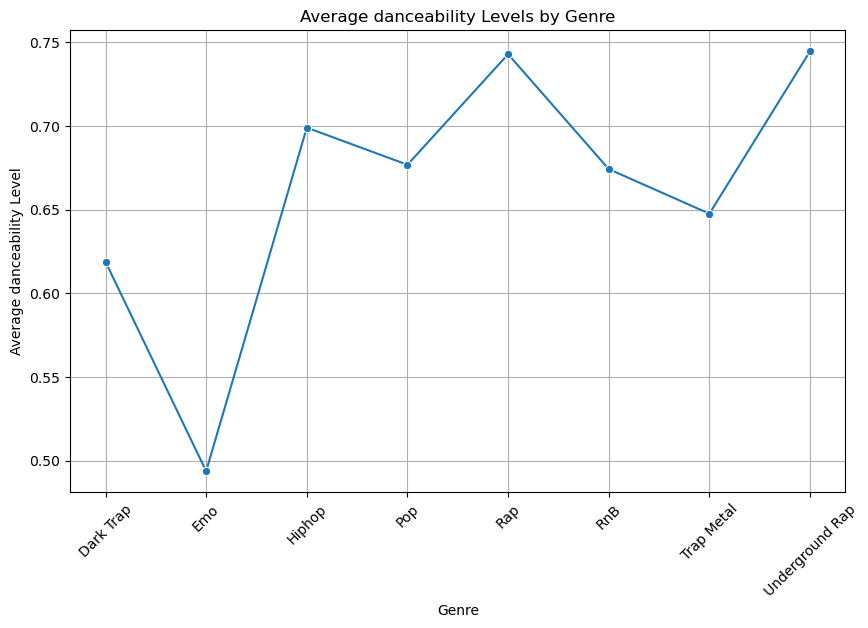

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


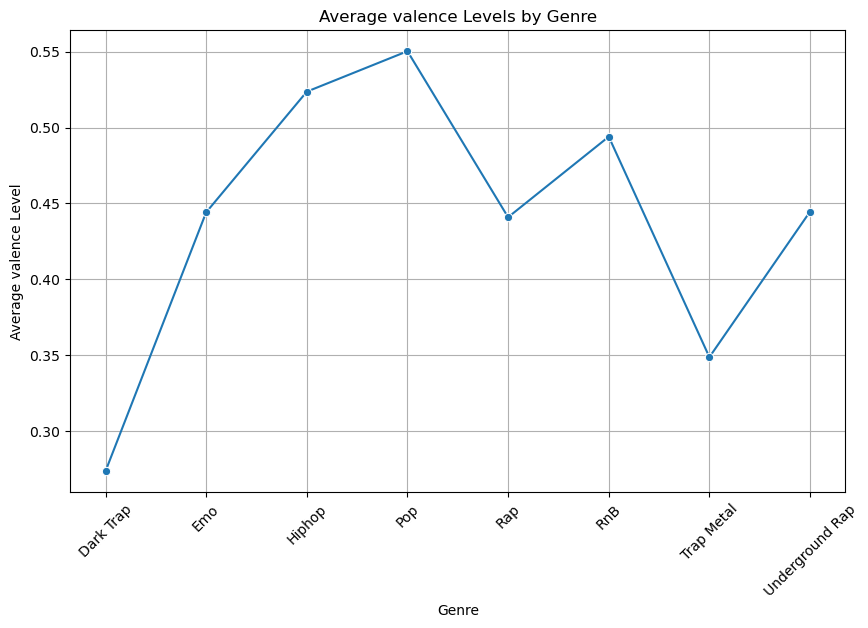

In [45]:
genre_danceability_avg = merged_df.groupby('genre')['danceability'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=genre_danceability_avg, x='genre', y='danceability', marker='o')
plt.title('Average danceability Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Average danceability Level')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

genre_valence_avg = merged_df.groupby('genre')['valence'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=genre_valence_avg, x='genre', y='valence', marker='o')
plt.title('Average valence Levels by Genre')
plt.xlabel('Genre')
plt.ylabel('Average valence Level')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

comparing these 2 graphs doesn't show much of a connection betwee danceability and valence across genres: 
- They do tend to be of similar prominence for Hiphop, Pop, and to a lesser extend, RnB.
- Dark Trap and Emo are almost inverse, and Trap Metal is also widely different - suggesting that "darker" genres get their danceability from somethig else, perhaps tempo?


##### - Scatter plot of danceability vs. valence, colored by genre

<Figure size 1000x600 with 0 Axes>

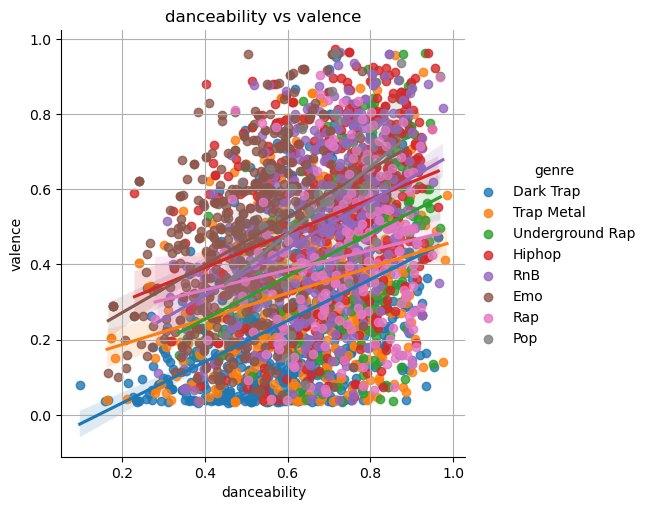

In [46]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='danceability', y='valence', data=sample_df, hue='genre')
plt.title('danceability vs valence')
plt.xlabel('danceability')
plt.ylabel('valence')
plt.grid(True)
plt.show()

The scatter plot shows more of a connection than the previous line graphs implied; overall, it looks like every genre does have a positive overall relationship between danceability and valence, it's just that the "darker" genres have less of one.